<a href="https://colab.research.google.com/github/ddovidovich/DataScienceLerning/blob/main/UNIT_12_DZ_Ultra_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Найдите любой другой сервис, подходящий для развертывания моделей и реализуйте произвольную задачу (разбор данного задания будет осуществлен на сервисе https://anvil.works/ для задачи классификации базы Ирисов)

P.s. вы можете взять любой другой сервис и любую другую задачу

Для данного задания я решил использовать сервис **"HuggingFace"**, который на данный момент доступен для жителей России и Республики Беларусь, а так же имеет бесплатный функционал достаточный для наших нужд. И так по порядку:

## 1. Подготовительный этап

Для выполнения домашнего задания я решил использовать модель для распознования изображенного объекта на картинке из темы "Базовый блок | Модули. Интеграция нейронной сети на ДЕМО-ПАНЕЛЬ". Для визуализации будем исползовать библиотеку **streamlit** 

### а - создадим папку с файлами необходимыми для нашей модели, например "TestModel"

### b - загрузим в эту папку нашу сохраненную модель в формате .h5, в моем случае это будет файл "model_fmr_all.h5"

### с - Создание файла app.py

Создайте файл app.py в вашем текстовом редакторе и введите следующий код:

In [ ]:
import asyncio
asyncio.set_event_loop(asyncio.new_event_loop())

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

img_width, img_height = 32, 32

# Загружаем модель
model = tf.keras.models.load_model('model_fmr_all.h5')
classes = {0: 'самолет',
           1: 'автомобиль',
           2: 'птица',
           3: 'кот',
           4: 'олень',
           5: 'собака',
           6: 'лягушка',
           7: 'лошадь',
           8: 'корабль',
           9: 'грузовик'}

# Определяем функцию для предсказания цифры на изображении
def predict_image(image):
    # Преобразование изображения в массив numpy
    img = np.array(image, dtype='float64') / 255
    # Преобразование изображения в формат, который ожидает модель
    img = np.expand_dims(image, axis=0)
    # Предсказание цифры
    prediction = model.predict(img)
    imagetype = classes[np.argmax(prediction)]
    return imagetype

# Определяем заголовок веб-приложения
st.title('Распознавание картинки')

# Загрузка изображения и предсказание цифры
uploaded_file = st.file_uploader("Загрузите изображение для распознования", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).resize((img_height, img_width))
    st.image(image, caption='Загруженное изображение', use_column_width=True)
    st.write('')
    st.write('На картинке предположительно:', predict_image(image))

Этот код определяет функцию predict_image(), которая загружает изображение, преобразует его в формат, который ожидает модель, и использует модель для предсказания типа объекта на изображении. Затем он определяет заголовок веб-приложения, создает возможность загрузки изображения и вызывает функцию predict_image() для предсказания.

### d - проверка кода локально

Перейдите в каталог, содержащий файл app.py, в терминале и запустите приложение, выполнив команду 

In [ ]:
streamlit run app.py

После запуска приложения должен открыться браузер с веб-интерфейсом приложения.

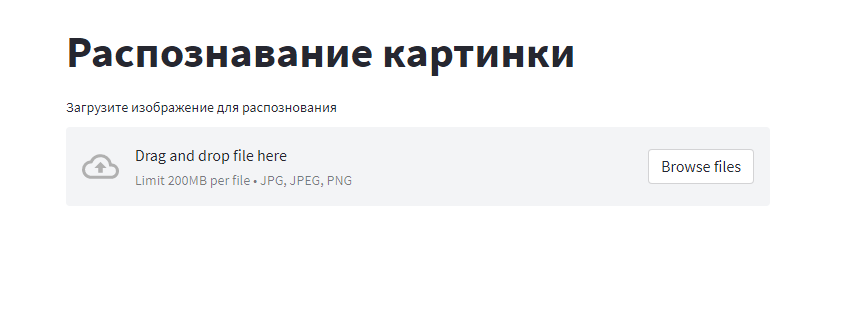

### e - создадим файл "requirements.txt" с требованиями необходимых пакетов

In [ ]:
streamlit 
pillow 
tensorflow 
h5py

### f - Загрузим файл модели model_fmr_all.h5 в нашу папку

Теперь папка с файлами должна выглядеть приблизительно так:
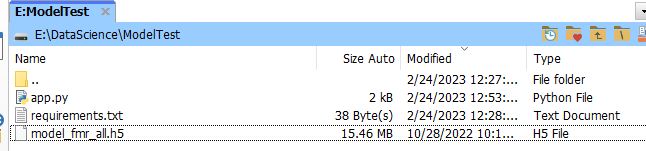

## 2. Развертывание приложения на Hugging Face

Hugging Face предоставляет возможность развертывания моделей и приложений на их облачной платформе Transformers. Чтобы развернуть приложение на платформе Hugging Face, выполните следующие шаги:

### a - Создайте репозиторий на GitHub, в котором будет храниться ваше приложение.

### b - Создайте аккаунт на Hugging Face.

Здесь все достаточно просто. Заходите на сайт [https://huggingface.co/](https://huggingface.co/)
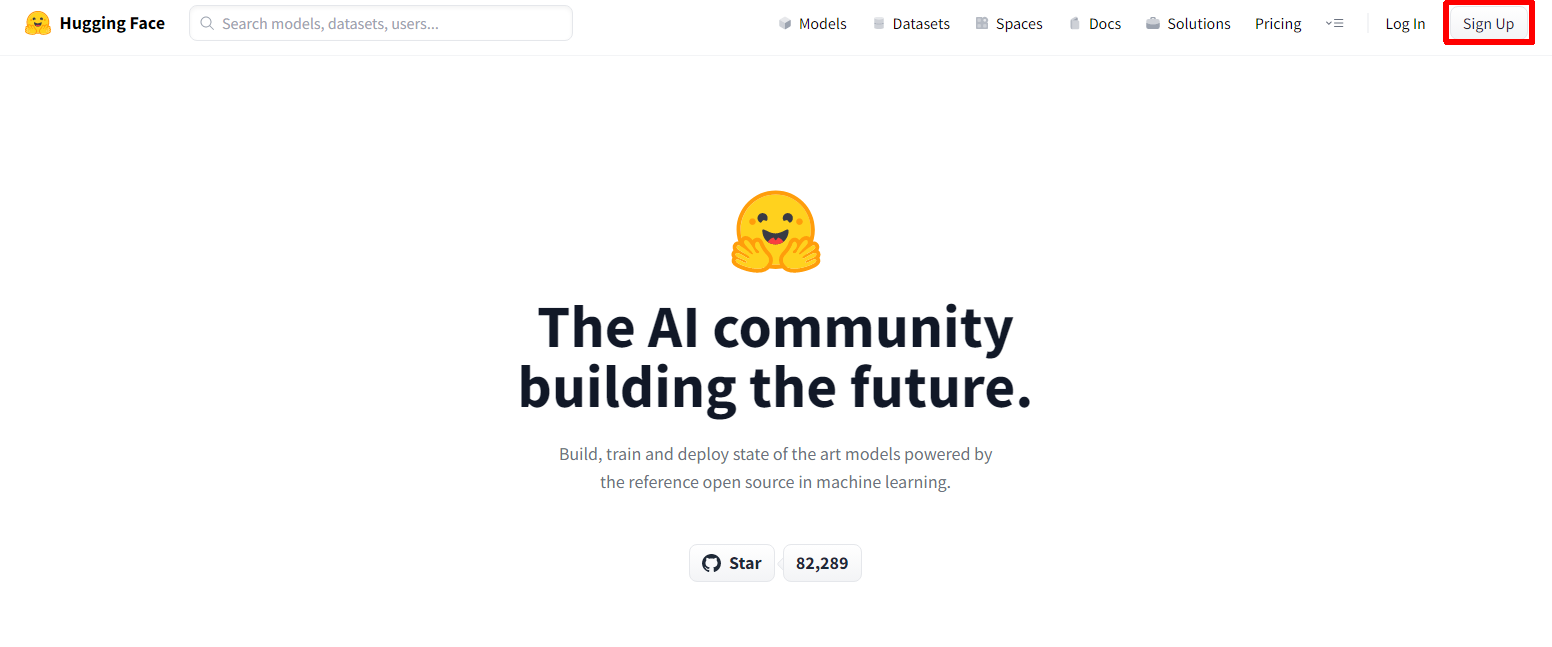

и жмете кнопку "Sign Up" в правом верхнем углу и попадаете на экран регистрации нового пользователя:


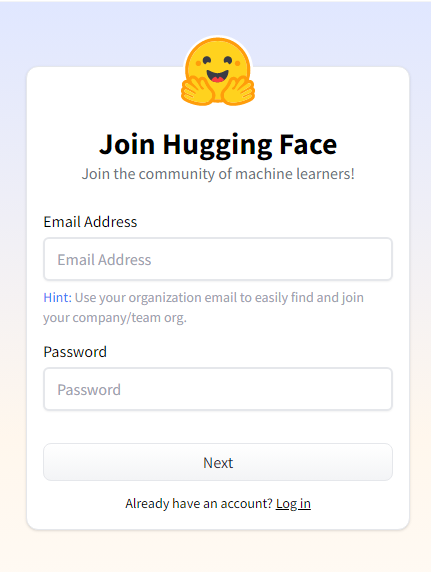

вводите вашу почту и новый пароль для этого сервиса, после чего вам на почту отправят письмо с подтверждением регистрации. Открываете письмо и подтверждаете регистрацию. На этом все!

Снова заходим по указанной выше ссылке на сайт и входим в свой аккаунт. Попадпем на страницу своего вновьсозданного профиля. Теперь нам надо создать новый "space" и разместить в нем нашу модель. Для этого нажимаем на кнопку "Spaces" вверху профиля

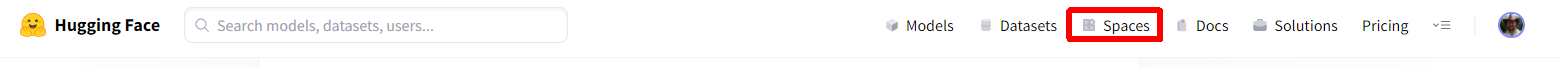

попадаем на страницу "spaces" 
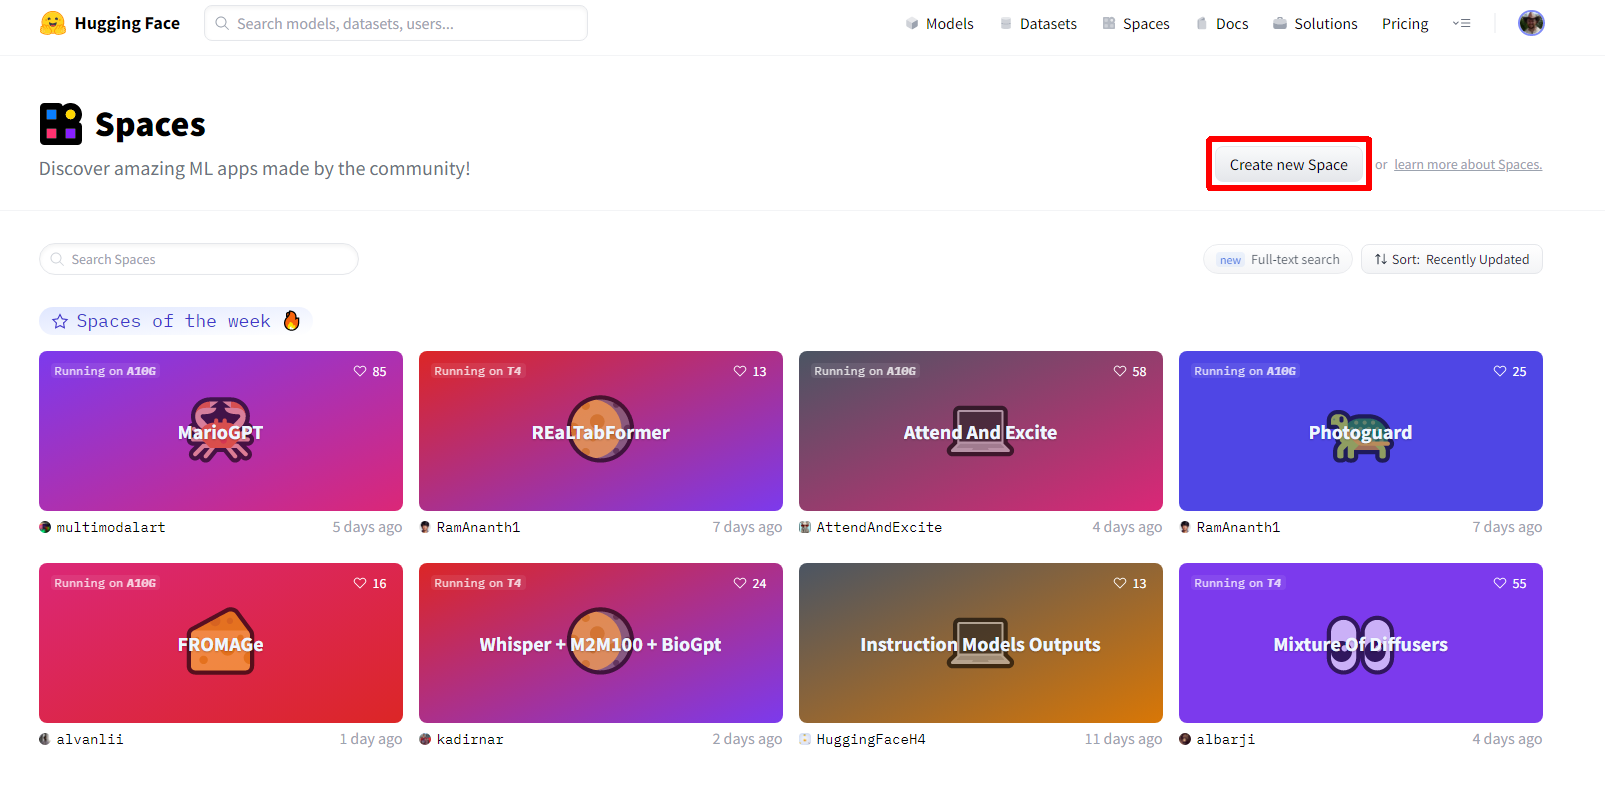
и жмем кнопку "Create new Space"

Попадаем на страницу выбора характеристик спэйса:
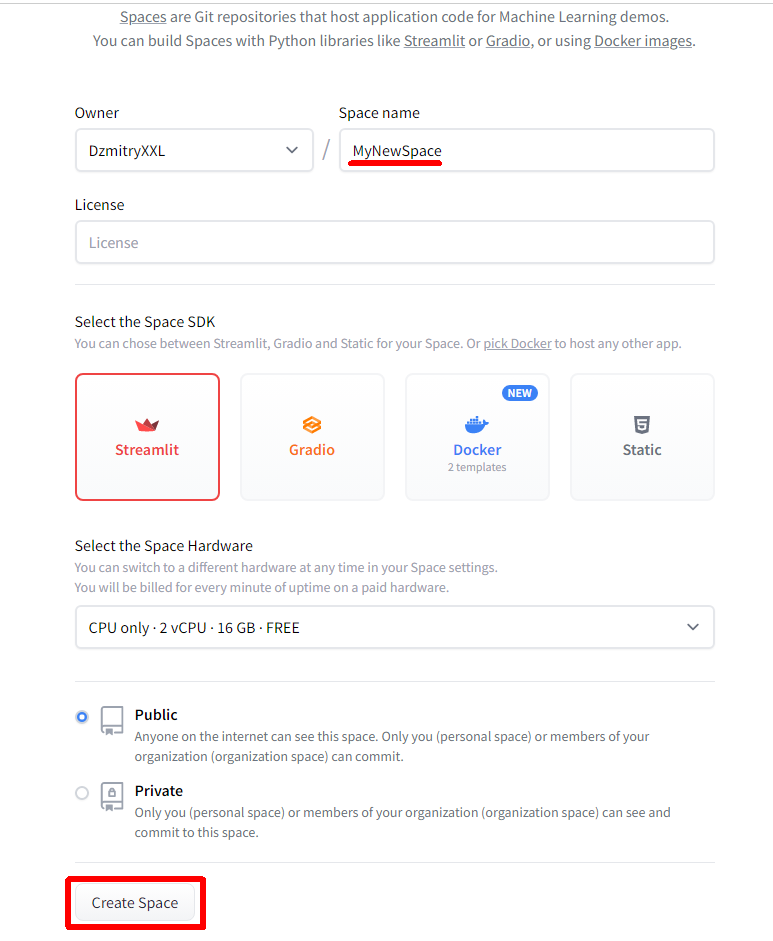

Обязательно вводим имя "Space name", в моем случае: "MyNewSpace". Выбираем тип SDK = Streamlit. В бесплатной версии нам доступны ресурсы железа только "CPU Only", но для наших нужд этого достаточно.

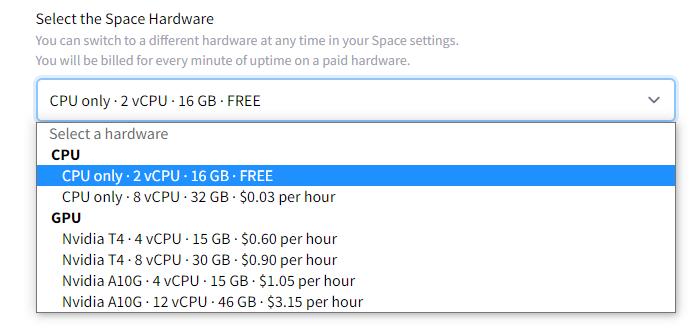

в платной версии этот список гораздо шире, плюс оплата берется почасовая.

Выбираем тип Pablick, так как нам необходимо чтобы другие люди тоже видели нашу модель и могли ей пользоваться.

Жмем кнопку "Create space"

Попадаем на страницу созданного пространства, на которой находится крайне полезное описание, которое стоит прочитать перед началом использования пространством

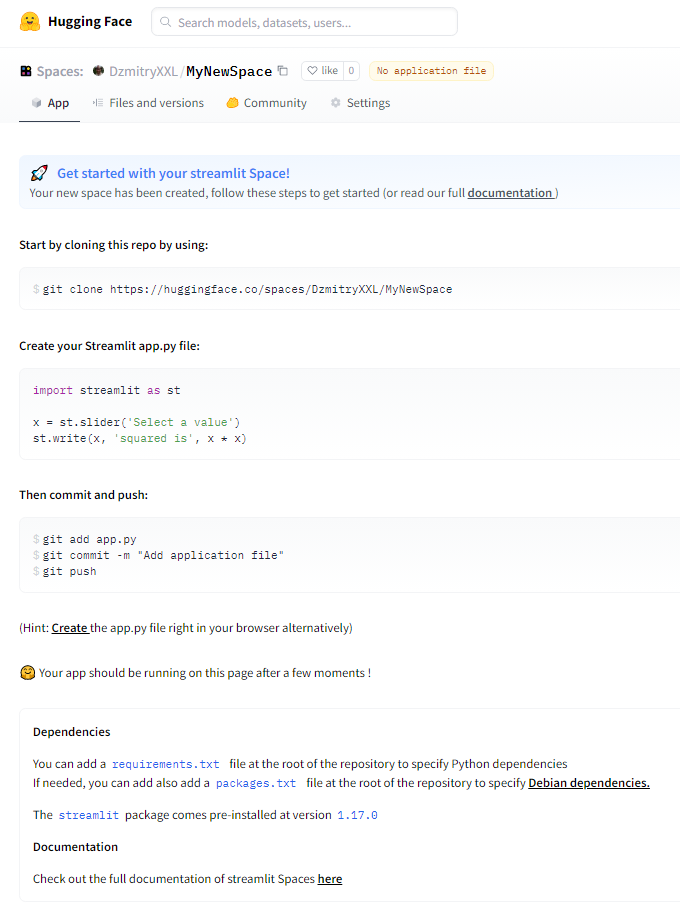

Переходим на вкладку **"Files and versions"**.

и жмем на кнопку справа **Add file -> Upload files**

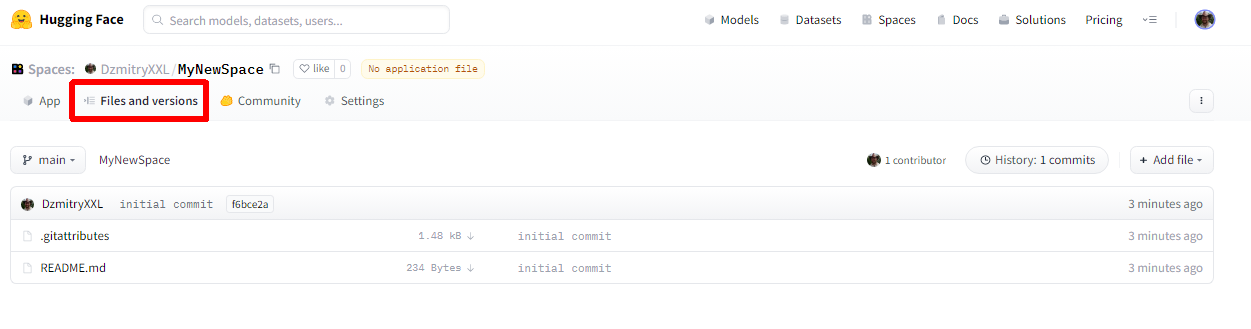

Перетаскиваем мышкой файлы из нашей папки с моделью, кодом и требованиями к пакетам в наше пространство. Все, проект загружен!

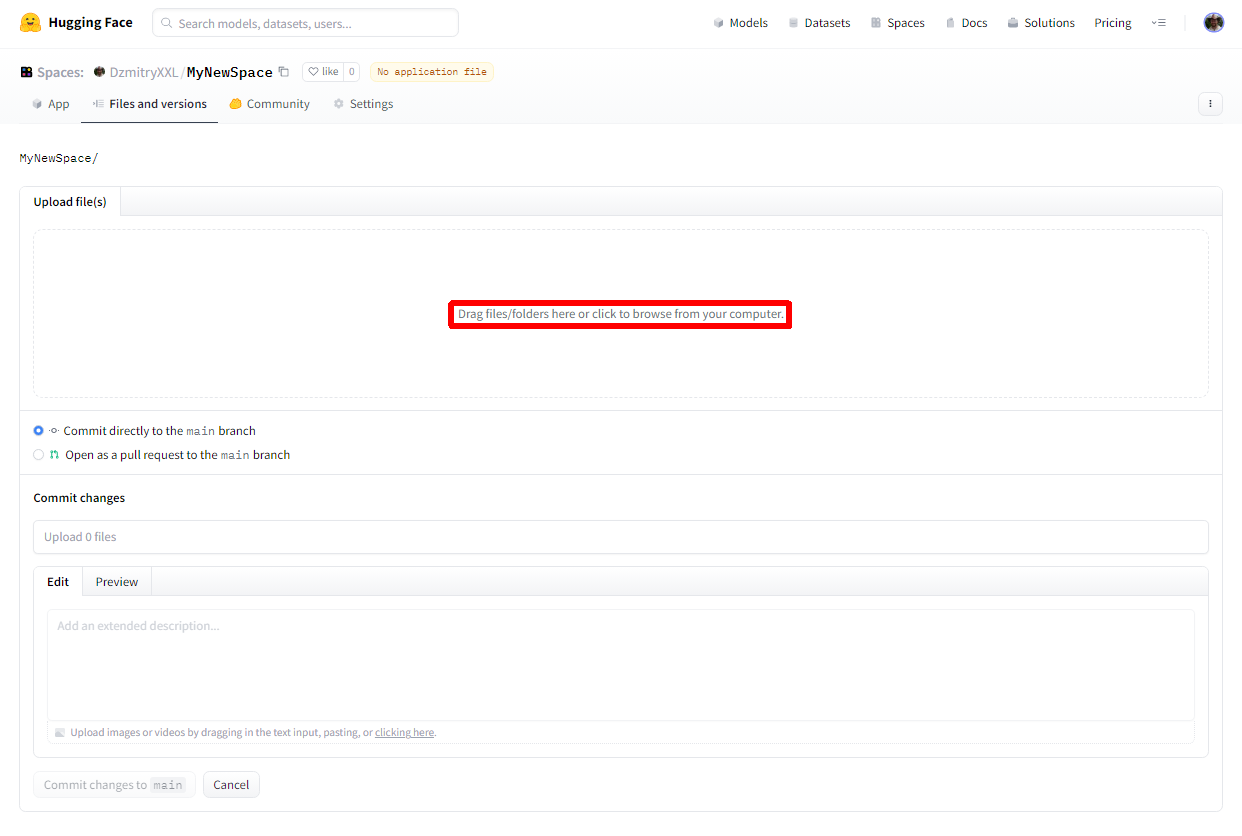

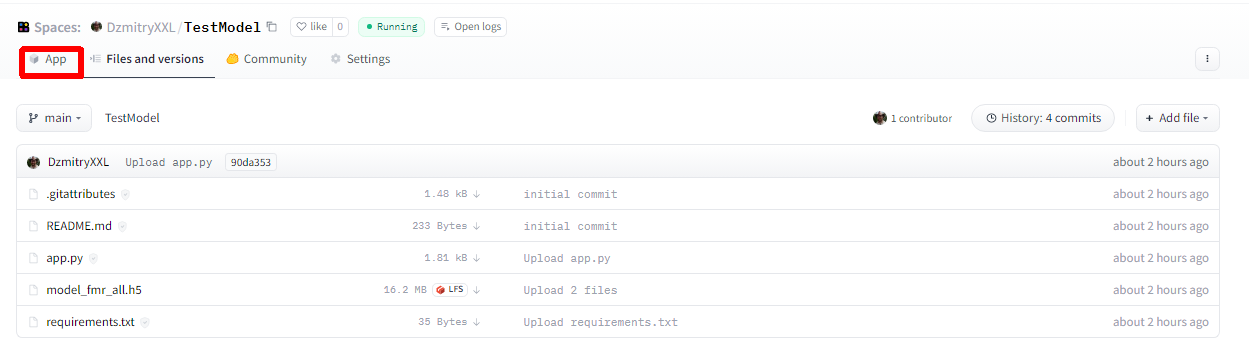

Переходим на вкладку App, и после небольшой задержки, необходимой для того чтобы подгрузить все необходимые библиотеки, если все сделано верно, то появится стартовая страница с нашим проектом:

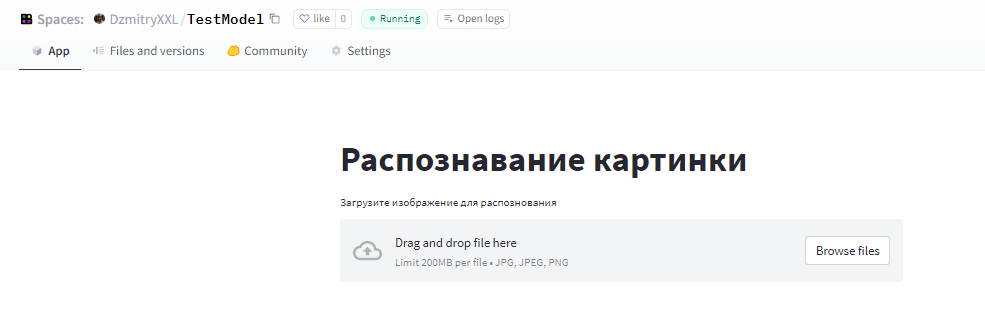

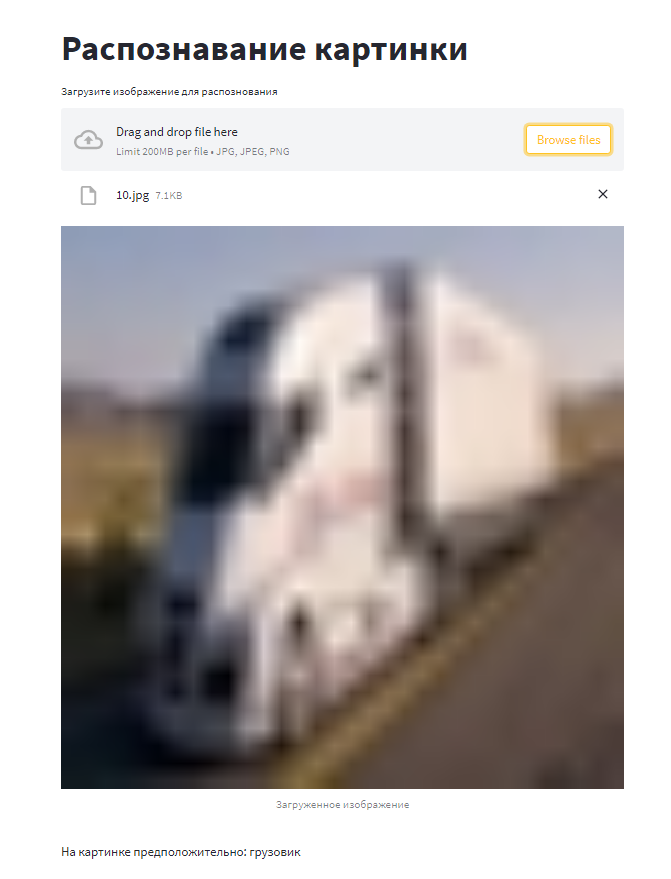

Как видно по последнему слайду, модель работает и делает предсказания изображенного на картинке объекта. Зайти на страницу с загруженной мною моделью и проверить ее работу можно по ссылке [https://huggingface.co/spaces/DzmitryXXL/TestModel](https://huggingface.co/spaces/DzmitryXXL/TestModel)